# Decision tree example with toy data
To illustrate the concept of risk and safe wrappers, this example uses:
- a simplified dataset
- a decision tree classifier

### Please note this is only so we can fit the illustrations nicely on a screen!

We'll start by importing some standard libraries, making our 'toy data, and showing what the first five rows look like

In [1]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from generate_data import make_toy_data

In [2]:
toy_df = make_toy_data([5, 50, 1])
toy_df.head()
feature_names = ('age','smoker','resting_hr','weight','employed','label')
labels_present = toy_df['label'].unique()
print(f'The different labels present are {labels_present}')

The different labels present are [0 1 2]


## Now imagine our researcher decides to investigate what factors lead to disease risk,
>- And they are not a ML expert 
>- so they split their data into features (X) and labels (y) to be predicted
>- and use the default algorithm settings to learn a decision tree

In [3]:
train_y = toy_df['label']
train_X = toy_df.drop('label', axis=1)
tree = DecisionTreeClassifier()
tree.fit(train_X, train_y)

print( f'Training set accuracy = {100*tree.score(train_X,train_y)}%')


Training set accuracy = 100.0%


## Great so far, ...  but what does this tree look like?

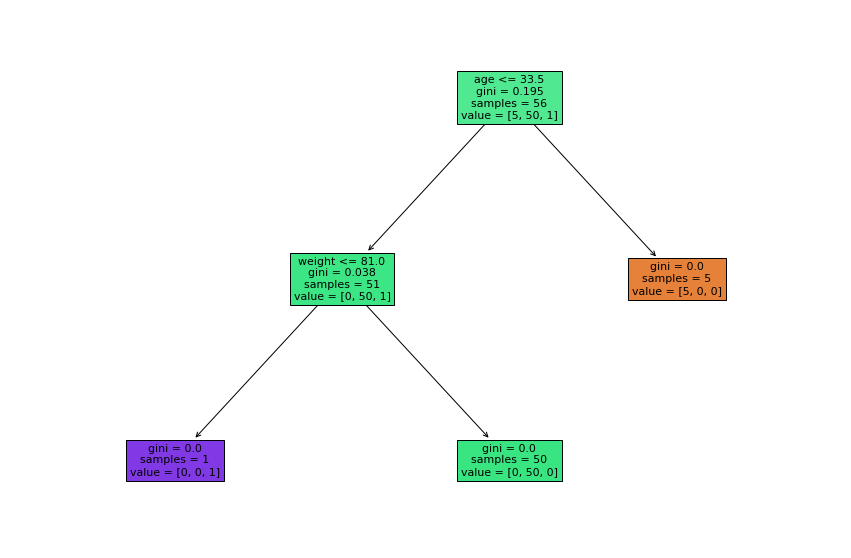

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
output = plot_tree(tree, filled=True, ax=ax, fontsize=11,feature_names = feature_names)

## What's the problem here?
There's exactly one person with 
>- Label 2
>- Resting Heart Rate between 52 and 58.5

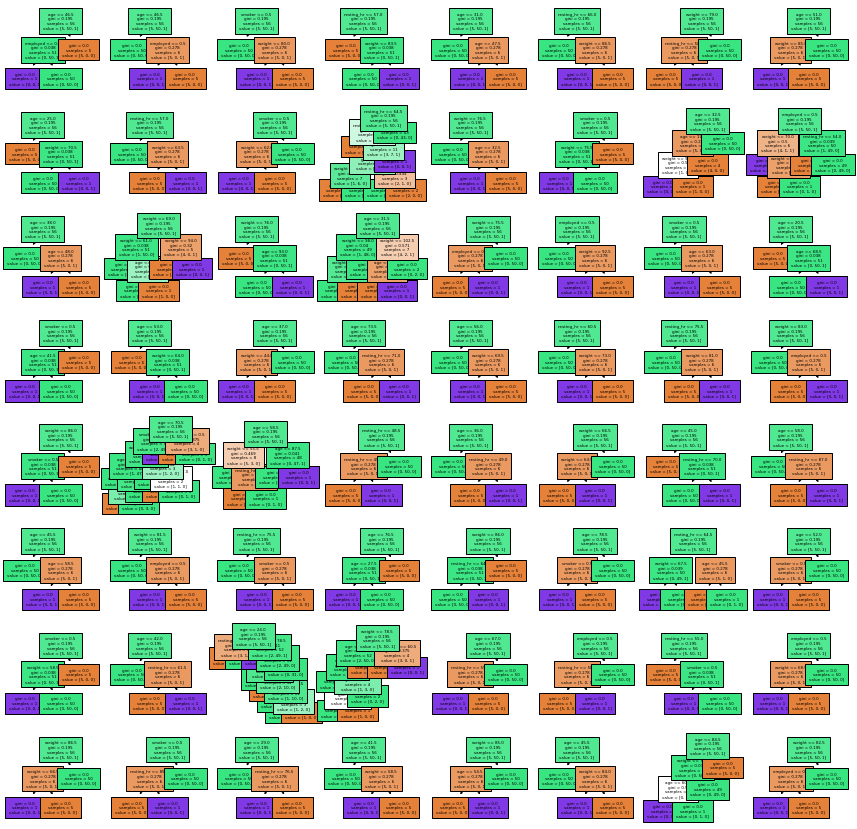

In [11]:
import numpy as np
grid=8
fig, axs = plt.subplots(grid, grid, figsize=(15, 15))
for i in range (grid*grid):
    
    toy_df = make_toy_data([5, 50, 1],seed=i*100)
    train_y = toy_df['label']
    train_X = toy_df.drop('label', axis=1)
    tree = DecisionTreeClassifier()
    tree.fit(train_X, train_y)
    row,col = int(np.floor(i/grid)), i%grid
    ax = axs[row,col]
    output = plot_tree(tree, filled=True, ax=ax, fontsize=4,feature_names = feature_names)

[Text(0.5, 0.875, 'resting_hr <= 63.5\ngini = 0.195\nsamples = 56\nvalue = [5, 50, 1]'),
 Text(0.25, 0.625, 'age <= 72.5\ngini = 0.444\nsamples = 6\nvalue = [4, 2, 0]'),
 Text(0.125, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.375, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [4, 0, 0]'),
 Text(0.75, 0.625, 'age <= 92.0\ngini = 0.078\nsamples = 50\nvalue = [1, 48, 1]'),
 Text(0.625, 0.375, 'smoker <= 0.5\ngini = 0.04\nsamples = 49\nvalue = [0, 48, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 48\nvalue = [0, 48, 0]'),
 Text(0.75, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.875, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]')]

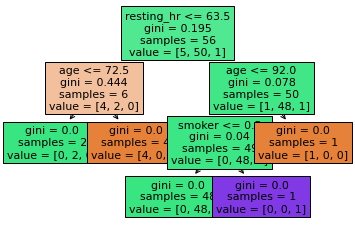

In [12]:
seed=190
toy_df = make_toy_data([5, 50, 1],seed)
train_y = toy_df['label']
train_X = toy_df.drop('label', axis=1)
tree = DecisionTreeClassifier()
tree.fit(train_X, train_y)
row,col = int(np.floor(i/grid)), i%grid

plot_tree(tree, filled=True,  fontsize=11,feature_names = feature_names)

In [25]:
print(train_X.shape[0])
paths = tree.decision_path(train_X)
print (paths[-1], paths[-1].sum())

56
  (0, 0)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1 4


In [22]:
print(feature_names)

('age', 'smoker', 'resting_hr', 'weight', 'employed', 'label')


new best with complexity 3 for seed 0
new best with complexity 4 for seed 18
new best with complexity 5 for seed 94
new best with complexity 6 for seed 649
new best with complexity 7 for seed 4009


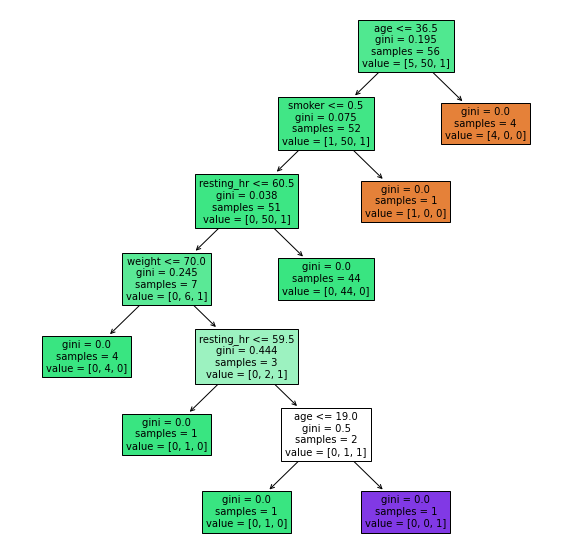

In [33]:
pathlength = 0
bestsofar=0
for attempts in range (20000):
    seed=attempts
    toy_df = make_toy_data([5, 50, 1],seed)
    train_y = toy_df['label']
    train_X = toy_df.drop('label', axis=1)
    tree = DecisionTreeClassifier()
    tree.fit(train_X, train_y)
    paths = tree.decision_path(train_X)
    complexity =  paths[-1].sum()
    if(complexity>bestsofar):
        bestsofar = complexity
        print(f'new best with complexity {complexity} for seed {attempts}')
        plot_tree(tree, filled=True,  fontsize=10,feature_names = feature_names)
        fig = plt.gcf()
        fig.set_size_inches(10,10)
    if(complexity>=15):
        break

 19 < age < 36.5
 smoker = 0
 59.5 < resting heart rate <= 60.5
 70 < weight